In [2]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* we have name , sex, ticket , cabin, Embarked as object data type 
* we gona convert sex feature in to int
* All other features like name , ticket , cabin , embarked we gona delete them as they are object type


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Age feature have some missing value , so gona use some statistic here
* fare feature have minimum value as zero , which is not possible 

In [6]:
data['Fare'].replace(0,data['Fare'].mean(),inplace = True)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data['Sex'].replace('male',0,inplace = True)

In [9]:
data['Sex'].replace('female',1,inplace = True)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data['Age'].count()

714

In [12]:
data['Age'].fillna(data['Age'].mean(),inplace = True)

In [13]:
data['Age'].isnull().sum()

0

In [14]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
data['Embarked'].isnull().sum()

2

In [16]:
# lets replace them with 0,1,2,3 
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace = True)

In [17]:
data['Embarked'].mode()

0    0.0
dtype: float64

In [18]:
# filling nan value the mode value
from math import nan
data['Embarked'].replace(nan,0,inplace = True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [20]:
# now deleting the column having object value
del data['Cabin']

In [21]:
del data['Name']

In [22]:
del data['Ticket']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


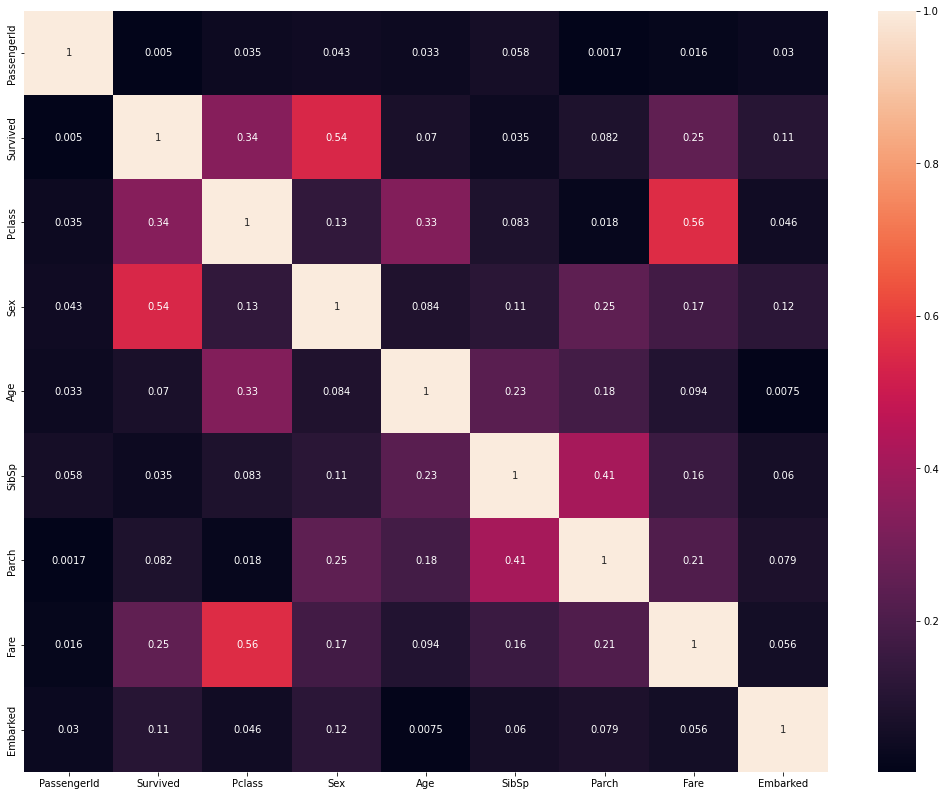

In [24]:
# ploting heatmap
df_corr = data.corr().abs()

plt.figure(figsize = (18,14))
sns.heatmap(df_corr,annot = True, annot_kws ={'size':10})
plt.show()

In [25]:
# no correlation exisst in out data set

y = data['Survived']
x = data.drop(columns='Survived', axis=1)

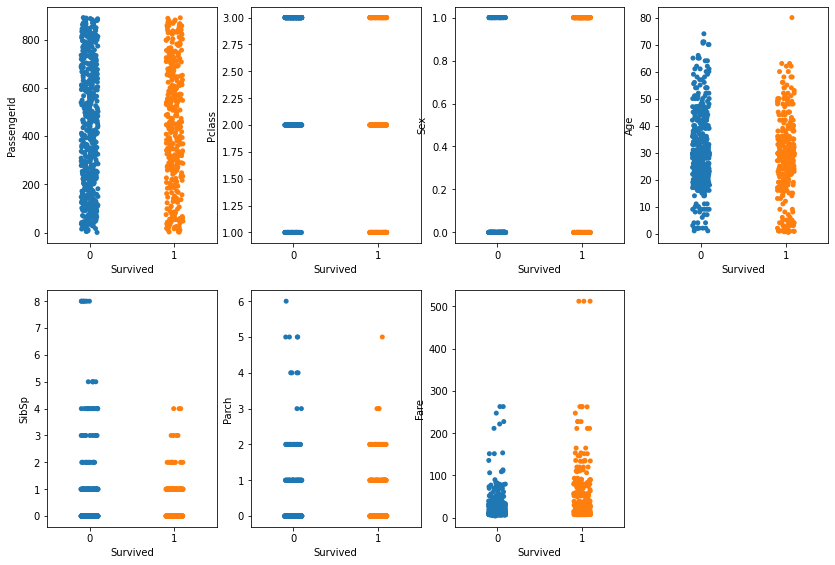

In [26]:
# Let's see how features are related to class
plt.figure(figsize=(14,20))
plotnumber = 1

for column in x:
  if plotnumber <=7:
    ax = plt.subplot(4,4,plotnumber)
    sns.stripplot(y,x[column])
  plotnumber+=1
plt.show()

In [27]:
# we are standardising the data 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
# now applying train test and split here
regression = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state=42)

In [45]:
regression.fit(x_train,y_train)
pred = regression.predict(x_train)
accuracy_score(y_train,pred)

0.8041733547351525

In [30]:
y_pred = regression.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8022388059701493

In [32]:
# confustion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[135,  22],
       [ 31,  80]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.78      0.72      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [34]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
# false +ve rate,True +ve rate

In [35]:
# Thresholds[0] means no instances predicted (it should be read from 0 - max)
print('Threshold=' , thresholds)
print('True positive rate=',tpr)
print('False positive rate=',fpr)


Threshold= [2 1 0]
True positive rate= [0.         0.72072072 1.        ]
False positive rate= [0.         0.14012739 1.        ]


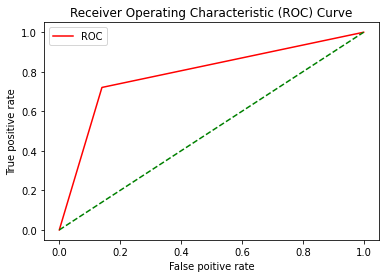

In [36]:
plt.plot(fpr,tpr,color='red',label= 'ROC')
plt.plot([0,1],[0,1], color ='green',linestyle='--')
plt.xlabel('False poitive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [37]:
# How much area it is covering (AUC)
auc_score= roc_auc_score(y_test,y_pred)
print(auc_score)

0.7902966660928444


In [38]:
# Now lets try the knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(x_train)
accuracy_score(y_train,y_pred)


0.8539325842696629

In [42]:
pred = knn.predict(x_test,)
accuracy_score(y_test,pred)

0.8059701492537313

In [44]:
print(classification_report(y_test,pred,digits =2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.82      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [49]:
gridsearch = GridSearchCV(estimator = knn, param_grid = grid_params)

In [50]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [52]:
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [54]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 13, weights= 'uniform')

In [56]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [57]:
y_pred = knn.predict(x_train)
accuracy_score(y_train,y_pred)

0.841091492776886

In [58]:
pred = knn.predict(x_test,)
accuracy_score(y_test,pred)

0.8097014925373134

In [59]:
print('Training set accuracy: ',accuracy_score(y_train, y_pred))
print('Test set accuracy: ',accuracy_score(y_test, pred))

Training set accuracy:  0.841091492776886
Test set accuracy:  0.8097014925373134
